## 손실 함수

### 오차제곱합

In [10]:
# 소수점 표현이 교재와 달라 format 함수로 자릿수를 맞춰줌
import numpy as np

def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# print(sum_squares_error(np.array(y), np.array(t)))
print(format(sum_squares_error(np.array(y), np.array(t)), '.18f'))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# print(sum_squares_error(np.array(y), np.array(t)))
print(format(sum_squares_error(np.array(y), np.array(t)), '.17f'))


0.097500000000000031
0.59750000000000003


### 교차손실함수

In [42]:
# np.log()에 0을 입력하게 되어 오류가 발생

def cross_entropy_error(y, t):
    return -np.sum(t * np.log(y))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

/var/folders/hn/nrs0d2b91f1f7jdk9wdd8yfc0000gn/T/ipykernel_3926/1968273501.py:4: RuntimeWarning: divide by zero encountered in log
  return -np.sum(t * np.log(y))
/var/folders/hn/nrs0d2b91f1f7jdk9wdd8yfc0000gn/T/ipykernel_3926/1968273501.py:4: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(t * np.log(y))


nan

In [43]:
# 위 에러를 방지하기 위해 아주 작은 값, delta를 추가
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

### 미니배치 학습

In [60]:
import numpy as np
from mnist import load_mnist

# one_hot_label=False로 설정하면 t_train, t_test의 값이 변함
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000,)


In [52]:
np.random.choice(60000, 10)

array([38624, 23946,  3365,  5518, 43332, 30918, 43674, 19923, 11125,
       33168])

In [49]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

### 배치용 교차 엔트로피 오차 구현하기

In [53]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    # t가 one-hot이므로 0과 곱해지는 부분은 무시가 됨
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [54]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    # t로 나타낸 인덱스를 y에서 추출해야 함 
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

## 수치 미분

- h의 값이 너무 작아 값이 제대로 표현되지 않고 0으로 바뀜
- 수치 미분에는 오차가 포함됨: 진정한 미분값을 컴퓨터에서 구할 수는 없음

In [69]:
def numerical_diff(f, x):
    h = 1e-50
    return (f(x+h)-f(x)) / h

In [71]:
import numpy as np

print(np.float32(1e-50))
print(np.float32(1e-4))

0.0
1e-04


중심/중앙 차분

In [106]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [73]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

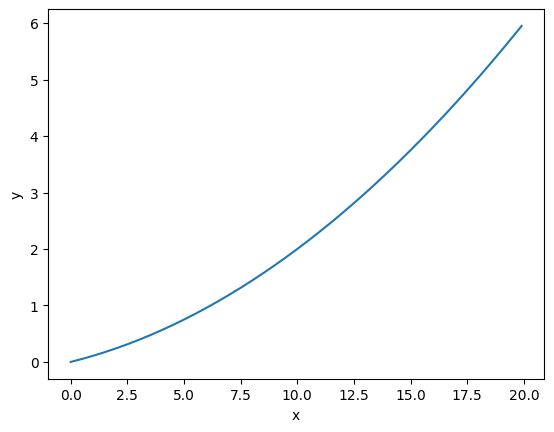

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# 교재와 눈금이 다르게 표시됨. 교재에서는 x축의 값이 [0, 5, 10, 15, 20]임
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.show()

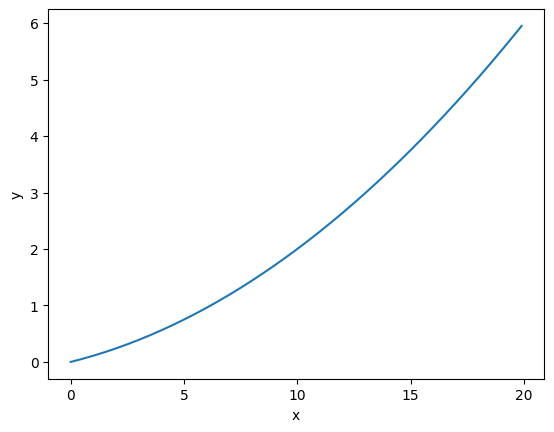

In [77]:
plt.xlabel('x')
plt.ylabel('y')
# x축 눈금 범위를 변경하여 축을 교재와 동일하게 표현
plt.xticks(np.arange(0,25,5,dtype=np.int_))

plt.plot(x, y)
plt.show()

In [79]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


편미분

In [80]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [81]:
# 여기서 상수를 바꾸더라도 미분에는 영향을 주지 않음. 변수 x1이 아니기 때문.
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [86]:
# 여기서 상수를 바꾸더라도 미분에는 영향을 주지 않음. 변수 x1이 아니기 때문.
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

### 기울기

In [91]:
def numerical_gradient(f, x):
    # 여기에 들어가는 함수 f가 갖는 변수 리스트가 값을 두 개 필요로 함
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp = x[idx]
        x[idx] = tmp + h
        h1 = f(x)

        x[idx] = tmp - h
        h2 = f(x)

        grad[idx] = (h1 - h2) / (2*h)
        x[idx] = tmp
    
    return grad

In [104]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = tmp_val + h
        fxh1 = f(x)
        print(x)
        print(fxh1)

        x[idx] = tmp_val - h
        fxh2 = f(x)
        print(x)
        print(fxh2)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        print(grad)
        print('-----------')
        x[idx] = tmp_val
    
    return grad

In [89]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))


[6. 8.]
[0. 4.]
[6. 0.]


경사법

In [2]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    for i in range(100):
        init_x = init_x - lr * numerical_gradient(f, init_x)

    return init_x

In [3]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [9]:
import numpy as np

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [10]:
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100))
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


In [16]:
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

[-2.99999994  3.99999992]


In [20]:
distances

[4.999999899999992,
 4.999999000000099,
 4.999990000009901,
 4.999900000989994,
 4.9990000989935295,
 4.990009893535113,
 4.900983563249508,
 4.092834023440393,
 0.6630977794730825,
 1.018517988165069e-09,
 5.0,
 25930743973412.34]

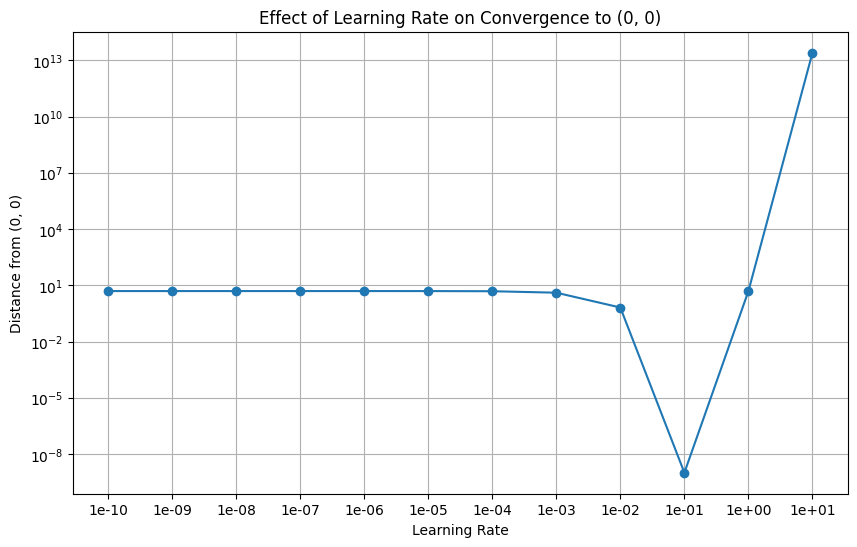

In [21]:
import matplotlib.pyplot as plt

# 적당한 학습률은 언제부터 등장할까? => 확인 결과 1e-1에서만 아주 낮은 loss를 갖는다는 것을 알 수 있다.
# 즉, 교재에 나타난 것은 일종의 cherry picking 결과였다는 것..!
lrs = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e-0, 1e+1]
xs,ys = [],[]

for i in range(len(lrs)):
    x, y = gradient_descent(function_2, init_x=init_x, lr=lrs[i], step_num=100)
    xs.append(x)
    ys.append(y)

# 각 학습률에서 (0,0)에 대한 유클리드 거리 계산
distances = [np.sqrt(x**2 + y**2) for x, y in zip(xs, ys)]

# 거리와 학습률에 대한 그래프 생성
plt.figure(figsize=(10, 6))
plt.semilogx(lrs, distances, marker='o')
plt.semilogy()
plt.xticks(lrs, labels=[f'{lr:.0e}' for lr in lrs])
plt.xlabel('Learning Rate')
plt.ylabel('Distance from (0, 0)')
plt.title('Effect of Learning Rate on Convergence to (0, 0)')
plt.grid(True)
plt.show()

신경망에서의 기울기

In [114]:
def softmax(x):
    if x.ndim == 2:
        x = x.T ## transpose를 취하지 않으면 행의 최댓값으로의 뺄셈이 불가능해짐
        x = x - np.max(x, axis=0) ## np.max는 (a, b) 형태이므로 이를 뺄셈할 때 행 단위로 다른 값을 빼야하기 때문에 transpose
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책: softmax에 특정 상수 C를 빼더라도 log 법칙에 의해 동일한 값이 유지됨
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(pred, target):
    return -np.sum(target * np.log(pred))

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite']) ## 1차원일 땐 flags='c_index'를 쓰지만 그럴 일은 없다.
    while not it.finished:
        idx = it.multi_index ## (0,0), (0,1), (0,2), (1,0), (1,1), (1,2) 순서로 돌아준다
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

In [109]:
import numpy as np

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [110]:
net = simpleNet()
print(net.W)

[[-0.93486159  0.72292419  0.84588469]
 [-0.21369294  0.06957341 -1.2719689 ]]


In [111]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))

[-0.7532406   0.49637059 -0.63724119]
1


In [112]:
t = np.array([0,0,1])
print(net.loss(x, t))

1.6089044296559096


In [115]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.10691411  0.37302185 -0.47993596]
 [ 0.16037117  0.55953278 -0.71990395]]


In [ ]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

### 학습 알고리즘 구현하기